# Multiresponse Regression Model

Text(0, 0.5, 'responses')

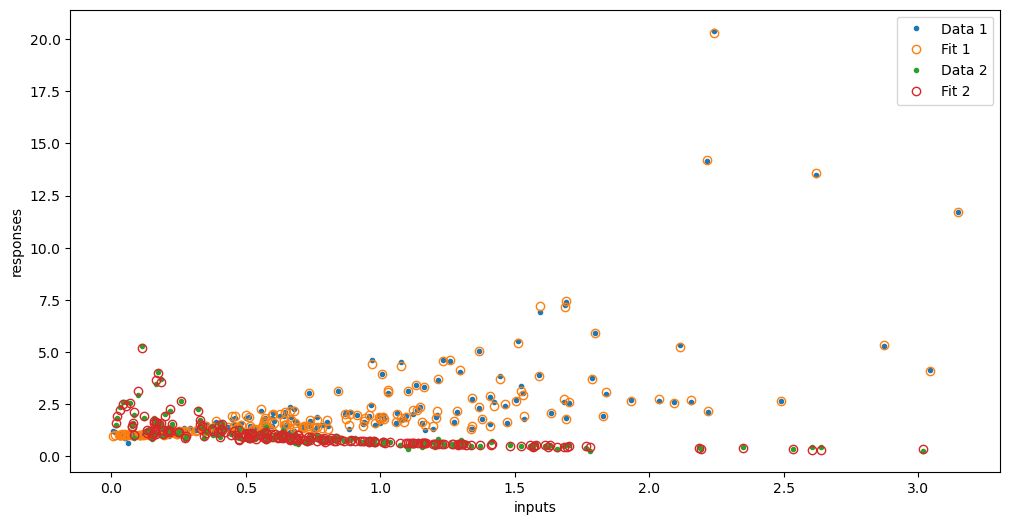

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def response_1(x, a, b):
    return np.exp(a * x[0] / (1 + b * x[1]))

def response_2(x, a, b):
    return (a + x[0]) / (b * x[1] + x[0]*a)

def fun(x, a, b):
    return np.vstack((response_1(x, a, b), response_2(x, a, b)))

np.random.seed(12)

a = 1.6
b = 2.2

N = 200

# 2 arrays with 200 elements
x = np.abs(np.random.randn(2, N))
y = fun(x, a, b) + np.random.randn(2, N) * 0.1

def min_fun(params, x, y, fun):
    
    a, b = params
    y_pred = fun(x, a, b)
    z = y_pred - y

    return np.linalg.det(z.dot(z.T))

sol = minimize(min_fun, [1.5, 2.0], args=(x, y, fun), bounds=[(1.0, 2.5), (1.0, 3.5)])
sol.x

yfit = fun(x, *sol.x)

fig, ax = plt.subplots(figsize = (12, 6), dpi = 100)

for i in range(2):
    ax.plot(x[i], y[i], '.', label = f'Data {i+1}')
    ax.plot(x[i], yfit[i], 'o', label = f'Fit {i+1}', mfc = 'None')
    
ax.legend()
ax.set_xlabel('inputs')
ax.set_ylabel('responses')